In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [7]:
dataset = pd.read_csv("IRIS.csv")

X = dataset.iloc[:,:4].values
y = dataset['species'].values
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [19]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[15,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  8]], dtype=int64)

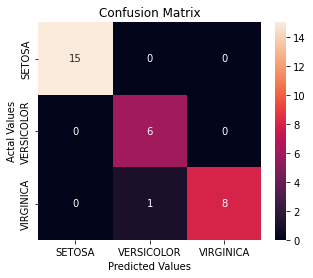

In [30]:
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLOR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLOR','VIRGINICA'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
TP_0 = cm[0,0]
TP_1 = cm[1,1]
TP_2 = cm[2,2]
FN_0 = cm[0,1]+ cm[0,2]
FN_1 = cm[1,0] + cm[1,2]
FN_2 = cm[2,0] + cm[2,1]
FP_0 = cm[1,0] + cm[2,0]
FP_1 = cm[0,1] + cm[2,1]
FP_2 = cm[0,2] + cm[1,2]
TN_0 = cm[1,1] +cm[2,1]+ cm[2,2] +cm[1,2]
TN_1 = cm[0,0] + cm[0,2] +cm[2,0] + cm[2,2]
TN_2 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

print('True positives for SETOSA,VERSICOLOR,VIRGINICA:', TP_0,TP_1,TP_2)
print('False positives for SETOSA,VERSICOLOR,VIRGINICA:', FP_0,FP_1,FP_2)
print('False negatives for SETOSA,VERSICOLOR,VIRGINICA:', FN_0,FN_1,FN_2)
print('True negatives for SETOSA,VERSICOLOR,VIRGINICA:', TN_0,TN_1,TN_2)

True positives for SETOSA,VERSICOLOR,VIRGINICA: 15 6 8
False positives for SETOSA,VERSICOLOR,VIRGINICA: 0 1 0
False negatives for SETOSA,VERSICOLOR,VIRGINICA: 0 0 1
True negatives for SETOSA,VERSICOLOR,VIRGINICA: 15 23 21


In [21]:
acc1 = (TP_0+TN_0)/(TP_0+TN_0+FP_0+FN_0)
print("Acc of setosa ", acc1)
acc2 = (TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1)
print("Acc of versicolor ", acc2)
acc3 = (TP_2+TN_2)/(TP_2+TN_2+FP_2+FN_2)
print("Acc of verginica ", acc3)
avg_acc = (acc1+acc2+acc3)/3
print("Average accuracy:",avg_acc)

Acc of setosa  1.0
Acc of versicolor  0.9666666666666667
Acc of verginica  0.9666666666666667
Average accuracy: 0.9777777777777779


In [22]:
prec1 = (TP_0)/(TP_0+FP_0)
print("Precision of setosa ", prec1)
prec2 = (TP_1)/(TP_1+FP_1)
print("Precision of versicolor ", prec2)
prec3 = (TP_2)/(TP_2+FP_2)
print("Precision of verginica ", prec3)

Precision of setosa  1.0
Precision of versicolor  0.8571428571428571
Precision of verginica  1.0


In [23]:
rec1 = (TP_0)/(TP_0+FN_0)
print("Recall of setosa ", rec1)
rec2 = (TP_1)/(TP_1+FN_1)
print("Recall of versicolor ", rec2)
rec3 = (TP_2)/(TP_2+FN_2)
print("Recall of verginica ", rec3)

Recall of setosa  1.0
Recall of versicolor  1.0
Recall of verginica  0.8888888888888888


In [24]:
TP = TP_0+TP_1+TP_2
TN = TN_0+TN_1+TN_2
FP = FP_0+FP_1+FP_2
FN = FN_0+FN_1+FN_2
print("TP TN FP FN", TP,TN,FP,FN)

TP TN FP FN 29 59 1 1


In [25]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

0.9777777777777777


In [26]:
precision = TP/(TP+FP)
print("Precision: ", precision)

Precision:  0.9666666666666667


In [27]:
recall = TP /(TP+FN)
print("Recall: ",recall)

Recall:  0.9666666666666667


In [28]:
error_rate = (FP+FN)/(TP+TN+FP+FN)
print("Error rate = ", error_rate)

Error rate =  0.022222222222222223


In [13]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor
